In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# BLOOD PRESSURE EFFECTS
models["Ans"].min_baro = 20.0
models["Ans"].set_baro = 57.5
models["Ans"].max_baro = 100.0
# maximum effect on heart rate with hypotension     = (min - set) * gain = (20 - 57.5)  * -1.88 = 70.5   + heart_rate_ref = max hr 210.5
# maximum effect on heart rate with hypertension    = (max - set) * gain = (100 - 57.5) * -1.88 = -42.55 + heart_rate_ref = min hr 60.1
models["Ans"].heart_rate_ref = 140.0
models["Ans"].g_map_hp = -1.88              
models["Ans"].tc_map_hp = 2.0
# maximum effect is 50% volume change on the venous reservoirs IVCE and SVC
# maximum effect on venpool with hypotension = (min - set) = -37.5 -> u_vol smaller by 50% = -0.5 -> gain 0.0133
# maximum effect on venpool with hypertension = (max - set) = 37.5 -> u_vol larger by 50% = 0.5   -> gain 0.0133
models["Ans"].g_map_ven_pool = 0.0133           
models["Ans"].tc_map_ven_pool = 60.0
# maximum effect is 50% contractility change of the heart chambers
# maximum effect on contracility with hypotension = (min - set) = -37.5 -> contractility larger by 20% = 0.5 -> gain -0.005
# maximum effect on contracility with hypertension = (min - set) = 37.5 -> contractility smaller by 20% = -0.5 -> gain -0.005
models["Ans"].g_map_cont = -0.005       
models["Ans"].tc_map_cont = 15.0
# maximum effect is 50% svr increase on the svr targets
# maximum effect on contracility with hypotension = (min - set) = -37.5 -> resistance larger by 200% -> gain -0.05
# maximum effect on contracility with hypertension = (min - set) = 37.5 -> lower smaller by 200% -> gain -0.05
models["Ans"].g_map_svr = -0.05
models["Ans"].tc_map_svr = 30.0

#PCO2 EFFECTS
models["Ans"].min_pco2 = 15.0
models["Ans"].set_pco2 = 35.5
models["Ans"].max_pco2 = 75.0
# maximum effect is 50% pvr increase (15-35-75)
# maximum effect on pvr with hypocapnia = (min - set) = -37.5 -> pvr smaller by 20% = 0.5 -> gain 0.005
# maximum effect on pvr with hypercapnia = (min - set) = 37.5 -> pvr larger by 20% = -0.5 -> gain 0.005
models["Ans"].g_pco2_ve = 0.0     
models["Ans"].tc_pco2_ve = 10.0

models["Ans"].g_pco2_hp = 0.0     
models["Ans"].tc_pco2_hp = 10.0

models["Ans"].g_pco2_cont = 0.0      
models["Ans"].tc_pco2_cont = 10.0

models["Ans"].g_pco2_venpool = 0.0      
models["Ans"].tc_pco2_venpool = 10.0

models["Ans"].g_pco2_svr = 0.0       
models["Ans"].tc_pco2_svr = 10.0

models["Ans"].g_pco2_pvr =0.0      
models["Ans"].tc_pco2_pvr = 10.0

#PO2 EFFECTS
models["Ans"].min_po2 = 30.0
models["Ans"].set_po2 = 80.5
models["Ans"].max_po2 = 150.0
# maximum effect is 50% pvr increase (15-35-75)
# maximum effect on pvr with hypocapnia = (min - set) = -37.5 -> pvr smaller by 20% = 0.5 -> gain 0.005
# maximum effect on pvr with hypercapnia = (min - set) = 37.5 -> pvr larger by 20% = -0.5 -> gain 0.005
models["Ans"].g_pco2_ve = 0.0     
models["Ans"].tc_pco2_ve = 10.0

models["Ans"].g_pco2_hp = 0.0     
models["Ans"].tc_pco2_hp = 10.0

models["Ans"].g_pco2_cont = 0.0      
models["Ans"].tc_pco2_cont = 10.0

models["Ans"].g_pco2_venpool = 0.0      
models["Ans"].tc_pco2_venpool = 10.0

models["Ans"].g_pco2_svr = 0.0       
models["Ans"].tc_pco2_svr = 10.0

models["Ans"].g_pco2_pvr =0.0      
models["Ans"].tc_pco2_pvr = 10.0

# PH EFFECTS
models["Ans"].min_ph = 6.9
models["Ans"].set_ph = 7.3
models["Ans"].max_ph = 7.7
# maximum effect is 50% pvr increase (15-35-75)
# maximum effect on pvr with hypocapnia = (min - set) = -37.5 -> pvr smaller by 20% = 0.5 -> gain 0.005
# maximum effect on pvr with hypercapnia = (min - set) = 37.5 -> pvr larger by 20% = -0.5 -> gain 0.005
models["Ans"].g_pco2_ve = 0.0     
models["Ans"].tc_pco2_ve = 10.0

models["Ans"].g_pco2_hp = 0.0     
models["Ans"].tc_pco2_hp = 10.0

models["Ans"].g_pco2_cont = 0.0      
models["Ans"].tc_pco2_cont = 10.0

models["Ans"].g_pco2_venpool = 0.0      
models["Ans"].tc_pco2_venpool = 10.0

models["Ans"].g_pco2_svr = 0.0       
models["Ans"].tc_pco2_svr = 10.0

models["Ans"].g_pco2_pvr =0.0      
models["Ans"].tc_pco2_pvr = 10.0


# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)
# 51/34 1600e

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.8 sec. Average model step in 0.0317 ms.


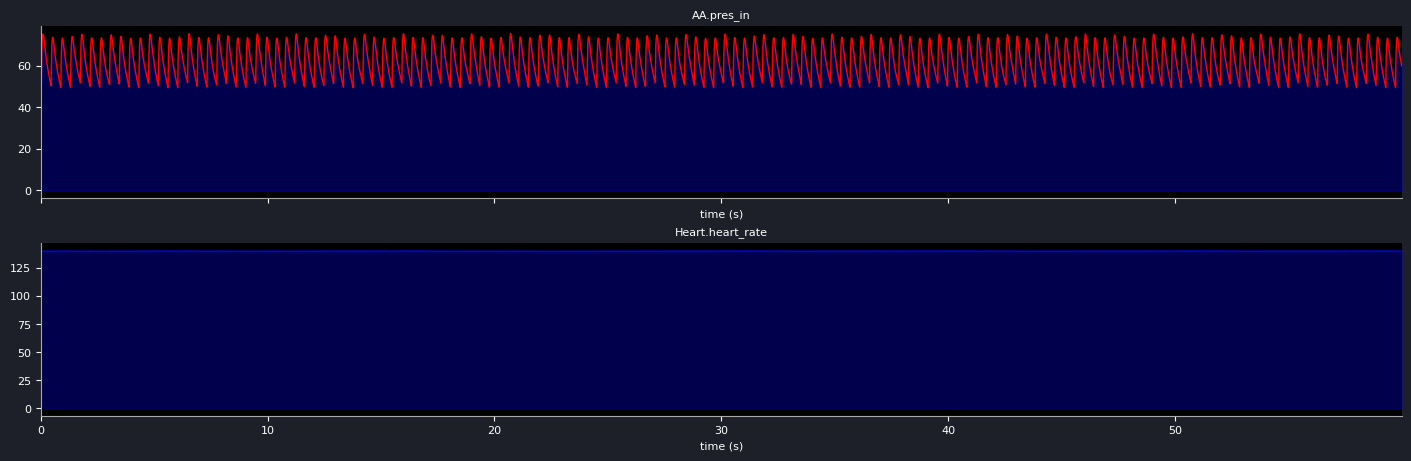


AA.pres_in      : max   75.44254 min   49.39569
Heart.heart_rate: max  139.92484 min  139.55528


In [5]:
#models["Fluids"].remove_volume(vol=75, in_time=10)
neo.plot_time_graph(["AA.pres_in","Heart.heart_rate"], combined=False, sharey=False, time_to_calculate=60, analyze=True, fill=True)

In [7]:
neo.calculate(60)

 Ready in 3.3 sec. Average model step in 0.0275 ms.


In [12]:
neo.analyze_heart()


LA_LV.flow      : net  238.17955, forward  238.17955, backward        0.0 ml/kg/min, stroke volume:    1.70127 ml/kg, 
RA_RV.flow      : net  238.11403, forward  238.11403, backward        0.0 ml/kg/min, stroke volume:     1.7008 ml/kg, 
RV_PA.flow      : net  236.31615, forward  236.31615, backward        0.0 ml/kg/min, stroke volume:    1.68796 ml/kg, 
LV_AA.flow      : net  236.48585, forward  236.48585, backward        0.0 ml/kg/min, stroke volume:    1.68917 ml/kg, 
IVCI_RA.flow    : net  131.33711, forward  137.75574, backward   -6.41863 ml/kg/min, stroke volume:    0.93811 ml/kg, 
SVC_RA.flow     : net  103.59966, forward  110.20199, backward   -6.60233 ml/kg/min, stroke volume:    0.73999 ml/kg, 
LA.pres_in      : max   10.58772 min    3.16746
RA.pres_in      : max   10.58251 min     2.7929
LV.pres_in      : max   75.65616 min      2.471
RV.pres_in      : max   46.12426 min    1.50822
AA.pres_in      : max   75.32811 min    49.3815
IVCI.pres_in    : max    8.77259 min    5.801